<a href="https://colab.research.google.com/github/estambolieva/asigmo_coursework2/blob/main/Asigmo_Titanic_Data_Preparation_and_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
# For creating charts: 
from matplotlib import pyplot as plt

# for having the graphs show up in the notebook, instead of as a pop up: 
%matplotlib inline

In [ ]:
# load the Titanic data into Pandas DataFrame using the .csv file
titanic = pd.read_csv('https://raw.githubusercontent.com/estambolieva/fast_track_to_python/master/day2/pandas/titanic_data/train.csv')

In [ ]:
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
titanic['Age_log_transform'] = (titanic.Age+1).transform(np.log)
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Age_log_transform
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,3.135494
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,3.663562
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,3.295837
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,3.583519
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,3.583519


In [ ]:
dummies = []
cols = ['Pclass', 'Sex', 'Embarked']
for col in cols:
    dummies.append(pd.get_dummies(titanic[col]))
    titanic_dummies = pd.concat(dummies, axis=1)

NameError: ignored

In [ ]:
 titanic_dummies
    titanic = pd.concat((titanic,titanic_dummies), axis=1)

IndentationError: ignored

In [ ]:
titanic['Age'] = titanic['Age'].interpolate()

## Feature Engineering 

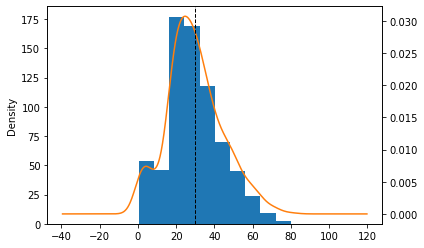

In [ ]:
ax_hist = titanic.Age.plot(kind='hist')    
titanic.Age.plot(kind='kde', ax=ax_hist, secondary_y=True)
plt.axvline(titanic.Age.mean(), color='k', linestyle='dashed', linewidth=1)

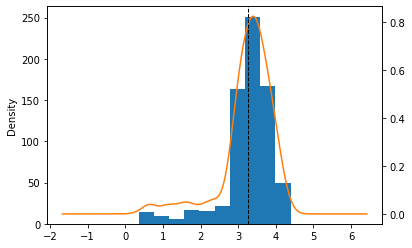

In [ ]:
ax_hist = titanic.Age_log_transform.plot(kind='hist')    
titanic.Age_log_transform.plot(kind='kde', ax=ax_hist, secondary_y=True)
plt.axvline(titanic.Age_log_transform.mean(), color='k', linestyle='dashed', linewidth=1)

In [ ]:
# Add a feature that extracts the title from the name

titanic['title'] = titanic.Name.str.split(", ",n=1,expand=True)[1].str.split(".",n=1,expand=True)[0].astype(str)


# Visualizations

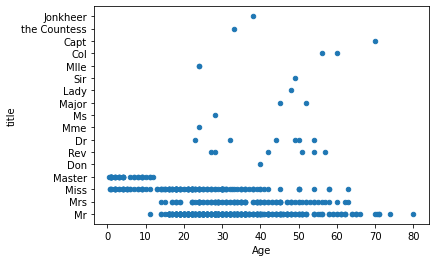

In [ ]:
titanic.plot.scatter(x="Age",y="title")